<a href="https://colab.research.google.com/github/evan15900/Lee113/blob/main/EX03_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
!wget -O taipei_sans_tc_beta.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

--2025-04-22 07:06:25--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 142.250.31.100, 142.250.31.138, 142.250.31.113, ...
Connecting to drive.google.com (drive.google.com)|142.250.31.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2025-04-22 07:06:25--  https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 172.253.63.132, 2607:f8b0:4004:c0b::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|172.253.63.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20659344 (20M) [application/octet-stream]
Saving to: ‘taipei_sans_tc_beta.ttf’

taipei_sans_tc_beta 100%[===================>]  19.70M  --.-KB/s    in 0.1s    

2025-04-22 07:06:28 (1

In [9]:
import matplotlib
import matplotlib.pyplot as plt
# 新增字體
matplotlib.font_manager.fontManager.addfont('taipei_sans_tc_beta.ttf')
# 設定中文字型及負號正確顯示
plt.rcParams['font.sans-serif'] = 'Taipei Sans TC Beta'
plt.rcParams["axes.unicode_minus"] = False

In [13]:
import pandas as pd
def get_stock_data(date, stock_no):
  url = f"https://www.twse.com.tw/rwd/zh/afterTrading/STOCK_DAY?date={date}&stockNo={stock_no}&response=html"
  df_mth = pd.read_html(url, header=1)[0]
  return df_mth

date_range = pd.date_range(start='20240401', end='20250401', freq='MS')
date_list = date_range.strftime('%Y%m%d').tolist()

df = pd.DataFrame()
for date in date_list:
  df = pd.concat([df, get_stock_data(date, '0050')], ignore_index=True)

df

,日期,成交股數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,成交筆數
0,113/04/01,5727780,904051439,158.20,158.75,157.25,157.40,-0.5,9814
1,113/04/02,7924481,1261718566,158.45,159.65,158.40,159.65,2.25,11341
2,113/04/03,5042947,799119313,158.65,158.90,157.80,158.55,-1.1,10098
3,113/04/08,6124837,976164820,158.65,159.85,158.55,159.45,0.9,12306
4,113/04/09,9043462,1465418271,160.00,163.35,159.90,163.25,3.8,15355
...,...,...,...,...,...,...,...,...,...
250,114/04/16,27131302,4408343222,163.80,163.80,161.40,162.35,-3.0,64314
251,114/04/17,20055649,3217845954,161.30,161.30,159.45,160.55,-1.8,41908
252,114/04/18,11985828,1932161023,161.40,161.80,160.60,160.90,0.35,28258
253,114/04/21,17835479,2837544386,160.75,160.75,158.50,158.60,-2.3,52059


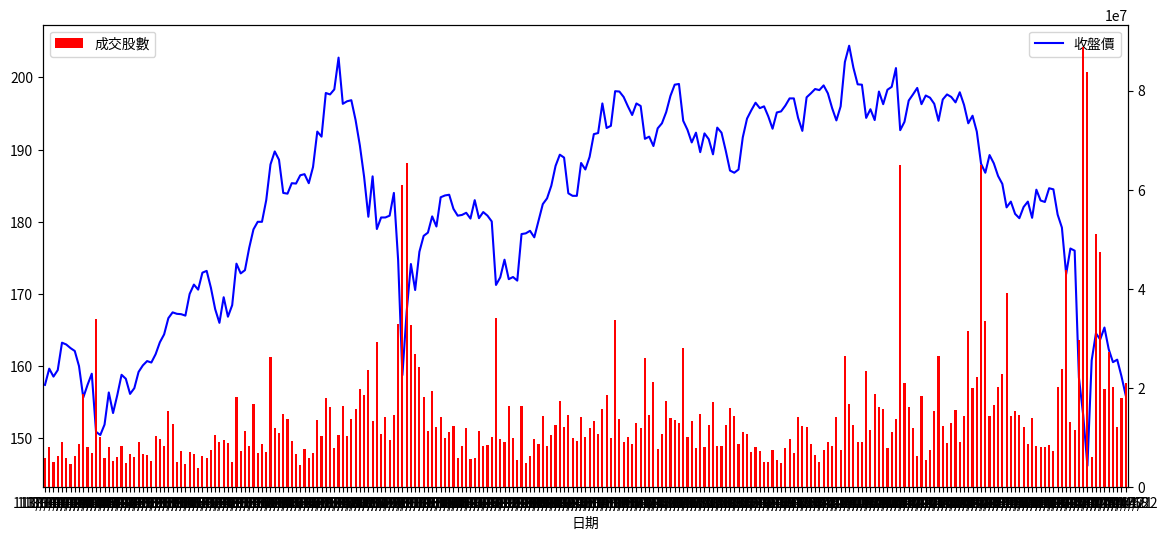

In [16]:
fig, ax1 = plt.subplots(figsize=(14,6))

df.plot(kind='line', x='日期', y='收盤價', ax=ax1, color='blue')
ax2 = ax1.twinx()
df.plot(kind='bar', x='日期', y='成交股數', ax=ax2, color='red')

plt.show()

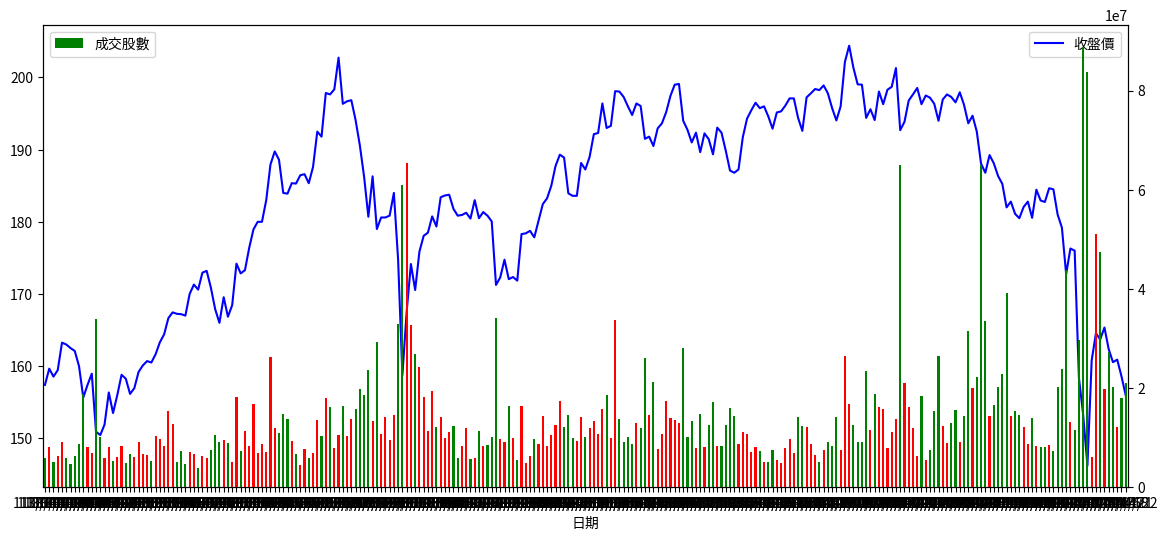

In [18]:
df['漲跌價差'] = pd.to_numeric(df['漲跌價差'], errors='coerce')
df['Color'] = df['漲跌價差'].apply(lambda x: 'green' if x < 0 else 'red')

fig, ax1 = plt.subplots(figsize=(14,6))

df.plot(kind='line', x='日期', y='收盤價', ax=ax1, color='blue')
ax2 = ax1.twinx()
df.plot(kind='bar', x='日期', y='成交股數', ax=ax2, color=df['Color'])

plt.show()